### Loading Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### Data
For this problem, we have three CSV files: train, test and sample submission.

* Train file will be used for training the model, i.e. our model will learn from this file. It contains all the independent variables and the target variable.
* Test file contains all the independent variables, but not the target variable. We will apply the model to predict the target variable for the test data.
* Sample submission file contains the format in which we have to submit out predictions

### Reading the data


In [2]:
train =  pd.read_csv('C:/Users/ahuja/Desktop/Internship/Project ML/Loan Prediction/train_ctrUa4K.csv')

In [3]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test = pd.read_csv('C:/Users/ahuja/Desktop/Internship/Project ML/Loan Prediction/test_lAUu6dG.csv')

In [5]:
test.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


Let's make a copy of train and test data so that even if we have to make any changes in these datasets we would not lose the original datasets.

In [6]:
train_original=train.copy()
test_original=test.copy()

## Understanding the data

In [7]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

We have similar features in the test dataset as the train dataset except the Loan_Status. We will predict the Loan_Status using the model built using the train data.

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
train.shape

(614, 13)

In [11]:
test.shape

(367, 12)

In [12]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

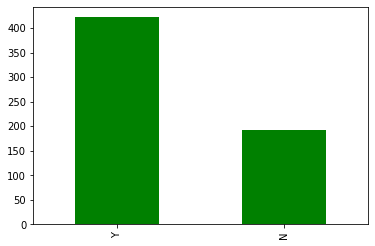

In [13]:
train['Loan_Status'].value_counts().plot.bar(color='g')

The loan of 422(around 69%) people out of 614 were approved.

Now, let's visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.

* Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)
* Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)
* Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount,Loan_Amount_Term)

### Independent Variable (Categorical)

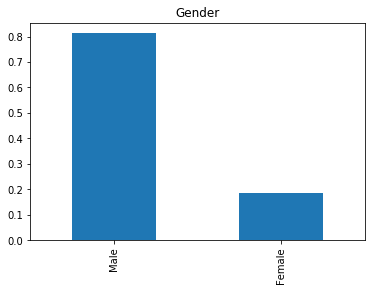

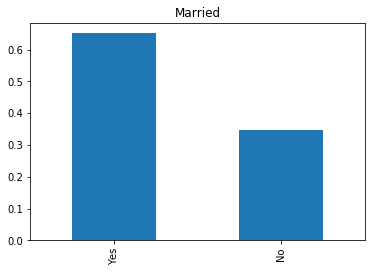

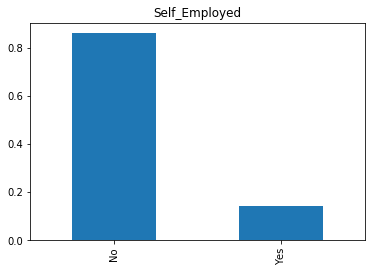

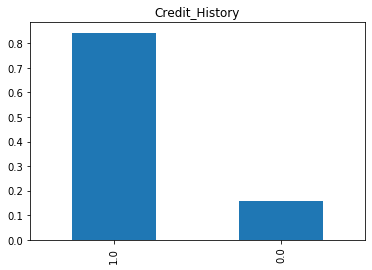

In [14]:
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.show()
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

It can be inferred from the above bar plots that:

* Around 80% applicants in the dataset are male.
* Around 65% of the applicants in the dataset are married.
* Around 15% applicants in the dataset are self employed.
* Around 85% applicants have repaid their doubts.

### Independent Variable (Ordinal)

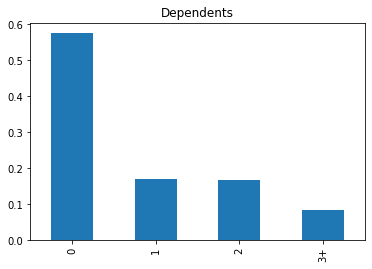

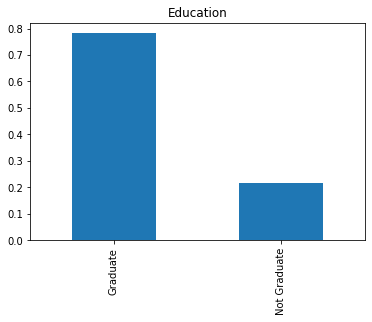

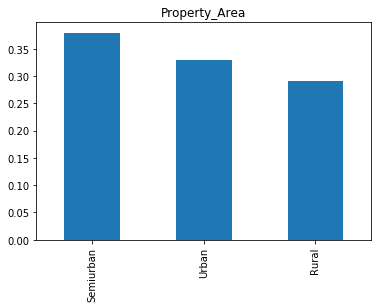

In [15]:
train['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')
plt.show()
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

Following inferences can be made from the above bar plots:

* Most of the applicants don't have any dependents.
* Around 80% of the applicants are Graduate.
* Most of the applicants are from Semiurban area.

### Independent Variable (Numerical)

Till now we have seen the categorical and ordinal variables and now lets visualize the numerical variables. Lets look at the distribution of Applicant income first.

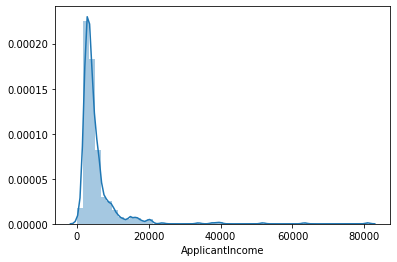

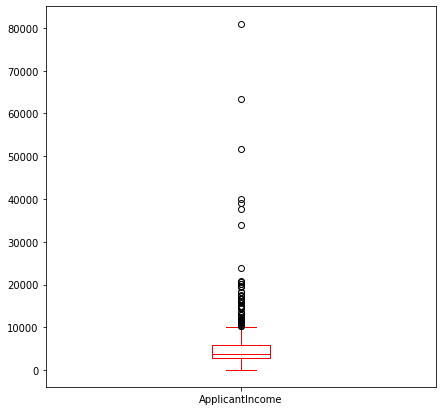

In [16]:
sns.distplot(train['ApplicantIncome'])
plt.show()
train['ApplicantIncome'].plot.box(figsize=(7,7), color='r')
plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is skewed and not perfectly normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.


The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different eduation levels. Let us segregate them by Education.

Text(0.5, 0.98, '')

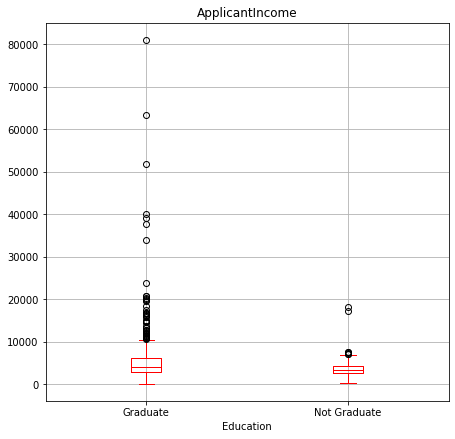

In [17]:
train.boxplot(column='ApplicantIncome', by = 'Education', figsize=(7,7), color='r') 
plt.suptitle("")

We can see that there are a higher number of graduates with very high incomes, which are appearing to be outliers.

Let's look at the Coapplicant income distribution.

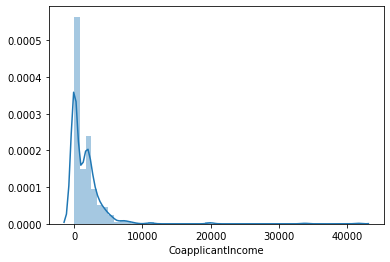

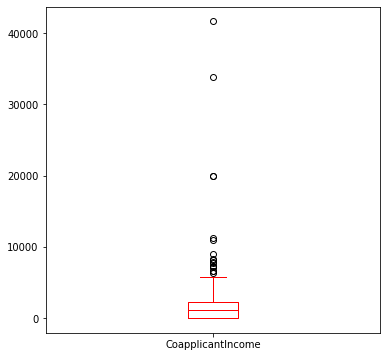

In [18]:
sns.distplot(train['CoapplicantIncome'])
plt.show()
train['CoapplicantIncome'].plot.box(figsize=(6,6), color='r')
plt.show()

We see a similar distribution as that of the applicant's income. The majority of co-applicants income ranges from 0 to 5000. We also see a lot of outliers in the applicant's income and it is not normally distributed.

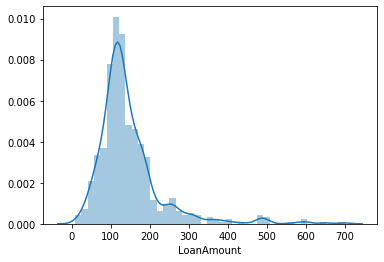

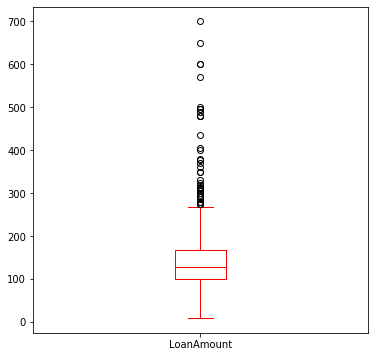

In [19]:
sns.distplot(train['LoanAmount'])
plt.show()
train['LoanAmount'].plot.box(figsize=(6,6), color='r')
plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

### Bivariate Analysis

Let's recall some of the hypotheses that we generated earlier:

* Applicants with high incomes should have more chances of loan approval.
* Applicants who have repaid their previous debts should have higher chances of loan approval.
* Loan approval should also depend on the loan amount. If the loan amount is less, the chances of loan approval should be high.
* Lesser the amount to be paid monthly to repay the loan, the higher the chances of loan approval.

Let's try to test the above-mentioned hypotheses using bivariate analysis.

After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.

### Categorical Independent Variables vs Target Variable

First of all, we will find the relation between the target variable and categorical independent variables. 
Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans.

In [20]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
print(Gender)


Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


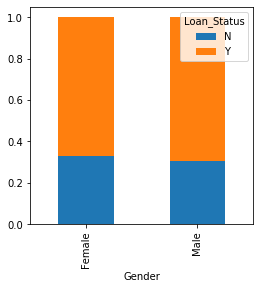

In [21]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

It can be inferred that the proportion of male and female applicants is more or less the same for both approved and unapproved loans.



Now let us visualize the remaining categorical variables vs target variable.

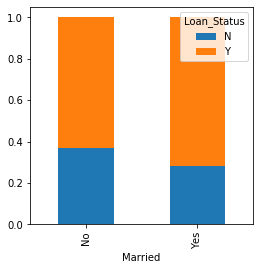

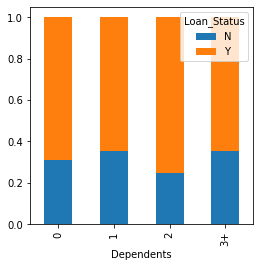

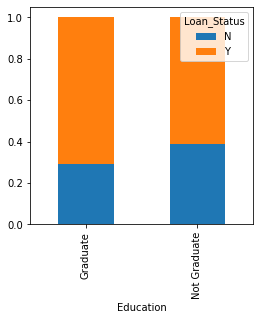

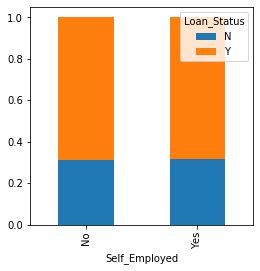

In [22]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

* The proportion of married appliants is higher for approved loans.
* Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
* There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

Now we will look at the relationship between remaining categorical independent variables and Loan_Status.

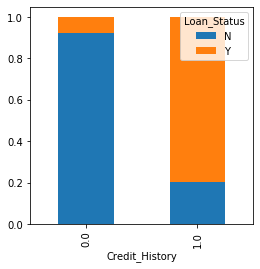

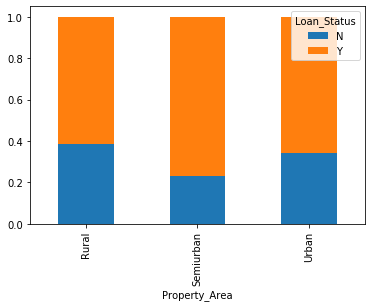

In [23]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

* It seems people with a credit history as 1 are more likely to get their loans approved.
* The proportion of loans getting approved in the semi-urban area is higher as compared to that in rural or urban areas.

Now let's visualize numerical independent variables with respect to the target variable.

### Numerical Independent Variable vs Target Variable

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

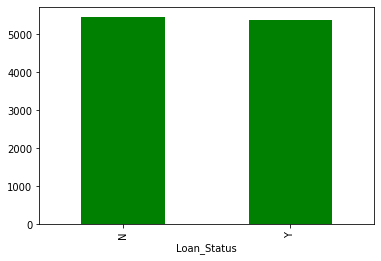

In [24]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar(color='g')

Here the y-axis represents the mean applicant income. We don't see any change in the mean income. So, let's make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

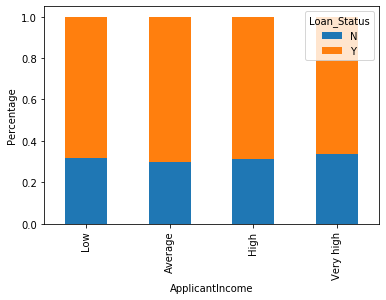

In [25]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

##### It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

We will analyze the coapplicant income and loan amount variable in similar manner.

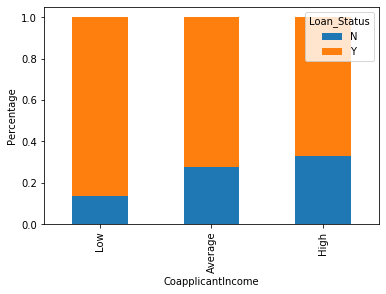

In [26]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')

It shows that if co-applicants income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don't have any co-applicant so the co-applicant income for such applicants is 0 and hence the loan approval is not dependent on it. So, we can make a new variable in which we will combine the applicant's and co-applicants income to visualize the combined effect of income on loan approval.

Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

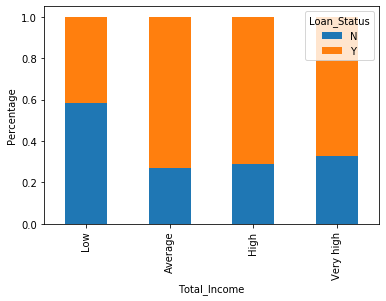

In [27]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less compared to that of applicants with Average, High & Very High Income.

Let's visualize the Loan Amount variable.

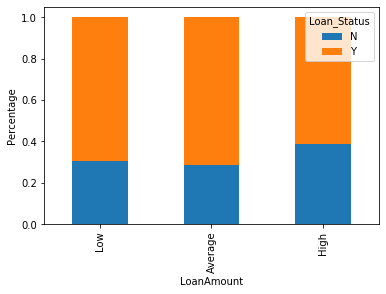

In [28]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')


##### It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [ ]:
train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)
#train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [ ]:
print(train.dtypes)

Now let's look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.


In [ ]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

We see that the most correlate variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

### Missing value imputation

Let's list out feature-wise count of missing values.

In [ ]:
train.isnull().sum()

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

* For numerical variables: imputation using mean or median
* For categorical variables: imputation using mode

There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features.

In [ ]:
train['Gender'].mode()

In [ ]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [ ]:
train['Loan_Amount_Term'].value_counts()

It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [ ]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use the median to fill the null values as earlier we saw that the loan amount has outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [ ]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

Now lets check whether all the missing values are filled in the dataset.

In [ ]:
train.isnull().sum()

As we can see that all the missing values have been filled in the training dataset. Let’s fill all the missing values in the test dataset too with the same approach.

In [ ]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Married'].fillna(train['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [ ]:
test.isnull().sum()

### Outlier Treatment

As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data. Let's examine what can happen to a data set with outliers.

<br>For the sample data set:
<br>1,1,2,2,2,2,3,3,3,4,4
<br>We find the following: mean, median, mode, and standard deviation
<br>Mean = 2.58
<br>Median = 2.5
<br>Mode=2
<br>Standard Deviation = 1.08
<br>If we add an outlier to the data set:
<br>1,1,2,2,2,2,3,3,3,4,4,400
<br>The new values of our statistics are:
<br>Mean = 35.38
<br>Median = 2.5
<br>Mode=2
<br>Standard Deviation = 114.74

It can be seen that having outliers often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove outliers from our data sets.
Due to these outliers bulk of the data in the loan amount is at the left and this is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

Let’s visualize the effect of log transformation. We will do the similar changes to the test file simultaneously.

In [ ]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let's build a logistic regression model and make predictions for the test dataset.

## Model Building

Let us make our first model to predict the target variable. We will start with Logistic Regression which is used for predicting binary outcome. <br />
* Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.
* Logistic regression is an estimation of Logit function. Logit function is simply a log of odds in favor of the event.
* This function creates a s-shaped curve with the probability estimate, which is very similar to the required step wise function <br />

Lets drop the Loan_ID variable as it do not have any effect on the loan status. We will do the same changes to the test dataset which we did for the training dataset. <br />

In [ ]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset.

In [ ]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare. Let us understand the process of dummies first:

* Consider the “Gender” variable. It has two classes, Male and Female.
* As logistic regression takes only the numerical values as input, we have to change male and female into numerical value.
* Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female), one for each class, i.e. Male and Female. 
* Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.

In [ ]:
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

Now we will train the model on training dataset and make predictions for the test dataset. But can we validate these predictions? One way of doing this is we can divide our train dataset into two parts: train and validation. We can train the model on this train part and using that make predictions for the validation part. In this way we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset). <br />

We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split. <br />

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3, random_state=0)

The dataset has been divided into training and validation part. Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)

In [ ]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv, pred_cv)

So our predictions are almost 80% accurate, i.e. we have identified 80% of the loan status correctly.

Let’s make predictions for the test dataset.

In [ ]:
pred_test = model.predict(test)

Lets import the submission file which we have to submit on the solution checker.

In [ ]:
submission = pd.read_csv("C:/Users/ahuja/Desktop/Internship/Project ML/Loan Prediction/sample_submission_49d68Cx.csv")

In [ ]:
submission.head(5)

We only need the Loan_ID and the corresponding Loan_Status for the final submission. we will fill these columns with the Loan_ID of test dataset and the predictions that we made, i.e., pred_test respectively.

In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

Finally we will convert the submission to .csv format.

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('C:/Users/ahuja/Desktop/Internship/Project ML/Loan Prediction/logistic.csv')